In [1]:
# import os
# import cv2
# import shutil

# # Path untuk video dan output
# video_path = 'dataset/video/05_EP03_06.avi'
# output_folder = 'dataset/casme_baru/Suprise/05_EP03_06'

# # Buat folder output jika belum ada
# os.makedirs(output_folder, exist_ok=True)

# # Buka video menggunakan OpenCV
# vidcap = cv2.VideoCapture(video_path)

# # Ambil frame rate dari video
# framePerSecond = vidcap.get(cv2.CAP_PROP_FPS)

# # Variabel untuk menghitung nomor frame
# count = 1

# while vidcap.isOpened():
#     success, image = vidcap.read()  # Baca frame
#     if not success:
#         break  # Jika tidak ada frame yang dibaca, keluar dari loop

#     # Simpan gambar ke folder output dengan nama imgX.jpg
#     img_name = f'img{count}.jpg'
#     img_path = os.path.join(output_folder, img_name)
#     cv2.imwrite(img_path, image)  # Simpan gambar

#     # print(f'Saved frame {count} to {img_path}')

#     count += 1

# # Lepas video setelah selesai
# vidcap.release()
# print(f"Extraction complete, saved {count-1} frames to {output_folder}")

import os
import cv2
import shutil

# Path utama
base_input_folder = 'dataset/Training_Bimbingan_Bu_Ula'
base_output_folder = 'dataset/Training_Bimbingan_Bu_Ula_Output'

# Bersihkan folder output jika ada
if os.path.exists(base_output_folder):
    shutil.rmtree(base_output_folder)

# Loop melalui folder dan file dalam folder input
for folder1 in os.listdir(base_input_folder):
    folder1_path = os.path.join(base_input_folder, folder1)
    
    print(f"Memeriksa folder1: {folder1_path}")
    
    if os.path.isdir(folder1_path):
        for filename in os.listdir(folder1_path):
            file_path = os.path.join(folder1_path, filename)
            
            # Cek apakah file adalah file .avi
            if filename.lower().endswith('.mp4') and os.path.isfile(file_path):
                print(f"Menemukan file AVI: {file_path}")

                # Buat folder output sesuai nama folder
                output_folder = os.path.join(base_output_folder, folder1, filename[:-4])  # Hapus ekstensi '.avi' dari nama folder
                os.makedirs(output_folder, exist_ok=True)

                # Buka video menggunakan OpenCV
                vidcap = cv2.VideoCapture(file_path)

                # Ambil frame rate dari video
                framePerSecond = vidcap.get(cv2.CAP_PROP_FPS)

                # Variabel untuk menghitung nomor frame
                count = 1

                while vidcap.isOpened():
                    success, image = vidcap.read()  # Baca frame
                    if not success:
                        break  # Jika tidak ada frame yang dibaca, keluar dari loop

                    # Simpan gambar ke folder output dengan nama imgX.jpg
                    img_name = f'img{count}.jpg'
                    img_path = os.path.join(output_folder, img_name)
                    cv2.imwrite(img_path, image)  # Simpan gambar

                    count += 1

                # Lepas video setelah selesai
                vidcap.release()
                print(f"Extraction complete for {filename}, saved {count-1} frames to {output_folder}")


Memeriksa folder1: dataset/Training_Bimbingan_Bu_Ula\Rendah
Menemukan file AVI: dataset/Training_Bimbingan_Bu_Ula\Rendah\Abdul Aziz_clip1.mp4
Extraction complete for Abdul Aziz_clip1.mp4, saved 260 frames to dataset/Training_Bimbingan_Bu_Ula_Output\Rendah\Abdul Aziz_clip1
Menemukan file AVI: dataset/Training_Bimbingan_Bu_Ula\Rendah\Abdul Aziz_clip2.mp4
Extraction complete for Abdul Aziz_clip2.mp4, saved 260 frames to dataset/Training_Bimbingan_Bu_Ula_Output\Rendah\Abdul Aziz_clip2
Menemukan file AVI: dataset/Training_Bimbingan_Bu_Ula\Rendah\Abian Agung Shafiqri_clip1.mp4
Extraction complete for Abian Agung Shafiqri_clip1.mp4, saved 260 frames to dataset/Training_Bimbingan_Bu_Ula_Output\Rendah\Abian Agung Shafiqri_clip1
Menemukan file AVI: dataset/Training_Bimbingan_Bu_Ula\Rendah\Abian Agung Shafiqri_clip2.mp4
Extraction complete for Abian Agung Shafiqri_clip2.mp4, saved 260 frames to dataset/Training_Bimbingan_Bu_Ula_Output\Rendah\Abian Agung Shafiqri_clip2
Menemukan file AVI: dataset/

In [1]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tabulate import tabulate
import pandas as pd
import shutil
np.set_printoptions(threshold=np.inf)


In [2]:
# Import module yang digunakan
from preprocessing.scarpping_component import extract_component_by_images
from feature_extraction.poc import POC
from feature_extraction.vektor import Vektor
from feature_extraction.quadran import Quadran
import re

def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('(\d+)', s)]

# load model dan shape predictor untuk deteksi wajah
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("models/shape_predictor_68_face_landmarks.dat")

components_setup = {
    'mulut': {
        'object_name': 'Mouth',
        'object_rectangle': {"x_right": 54, "x_left": 48, "y_highest": 52, "y_lowest": 57},
        'pixel_shifting': {"pixel_x": 25, "pixel_y": 10},
        'object_dimension': {'width': 140, 'height': 40}
    },
    'alis': {
        'object_name': 'alis',
        'object_rectangle': {"x_right": 26, "x_left": 17, "y_highest": 18, "y_lowest": 22},
        'pixel_shifting': {"pixel_x": 25, "pixel_y": 25},
        'object_dimension': {'width': 200, 'height': 40}
    },
}

# Inisialisasi variabel untuk path url dan blok size
blockSize = 7
pathDirectory = {
    "base_path_dataset": "dataset",
    # "base_dataset_input" : "dataset/casme_custom_from_one",
    "base_dataset_input" : "dataset/Training_Bimbingan_Bu_Ula_Output",
    "result_dataset" : "output-baru-bimbingan-bu-ula", 
    "component_image" : "component_to_images_bimbingan_bu_ula", 
    # "video_frame" :"video_to_images"
}

# Inisialisasi variabel untuk menyimpan data dari masing-masing komponen
frames_data_quadran = []
frames_data_all_component = []
frames_data_quadran_column = ['sumX', 'sumY', 'Tetha', 'Magnitude', 'JumlahQuadran']
quadran_dimensions = ['Q1', 'Q2', 'Q3', 'Q4']
frames_data = {component_name: [] for component_name in components_setup}
total_blocks_components = {component_name: 0 for component_name in components_setup}
data_blocks_first_image = {component_name: None for component_name in components_setup}
index = {component_name: 0 for component_name in components_setup}

# Hitung total blok dari masing-masing komponen lalu disetup kedalam total_blocks_components
for component_name, component_info in components_setup.items():
    total_blocks_components[component_name] = int((component_info['object_dimension']['width'] / blockSize) * (component_info['object_dimension']['height'] / blockSize))

# Loop melalui setiap kunci dan nilai di pathDirectory dan hapus direktorinya
for key, value in pathDirectory.items():
    # Jika tidak mengandung base, hapus direktori sesuai dengan nilai yang ada
    if not "base" in key:
        shutil.rmtree(value, ignore_errors=True)

# Looping folder label didalam base_dataset_input
for foldername_label in os.listdir(pathDirectory['base_dataset_input']):
    foldername_label_join_basepath = os.path.join(pathDirectory['base_dataset_input'], foldername_label)
    # Jika folder nya tidak ada skip looping ini
    if not os.path.isdir(foldername_label_join_basepath):
        continue
    
    # Looping folder label didalam foldername_label_join_basepath 
    for foldername in os.listdir(foldername_label_join_basepath):
        foldername_join_basepath = os.path.join(foldername_label_join_basepath, foldername)
        # Jika folder nya tidak ada skip looping ini
        if not os.path.isdir(foldername_join_basepath):
            continue

        # Reset variabel setiap kali mulai looping folder baru
        data_blocks_first_image = {component_name: None for component_name in components_setup}
        index = {component_name: 0 for component_name in components_setup}

        # looping semua file yang ada didalam
        for filename in sorted(os.listdir(foldername_join_basepath), key=natural_sort_key):
            if filename.endswith(".jpg") or filename.endswith(".png"): 

                # Read path sesuai dengan foldername_join_basepath dijoin path dengan filename
                image = cv2.imread(os.path.join(foldername_join_basepath, filename))
                # Resize image ke ukuran yang diinginkan
                # image = cv2.resize(image, (600, 500))
                # Cpmvert image ke grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Deteksi shape muka didalam grayscale image
                rects = detector(gray)

                if not index[component_name] == 0:
                    # Buat variabel frames_data_all_component untuk menampung data current frame
                    frame_data_all_component = {'Frame': f"{index[component_name] + 1}({filename.split('.')[0]})"}
                    # Buat variabel frame_data_quadran untuk menampung data current frame
                    frame_data_quadran = {'Frame': f"{index[component_name] + 1}({filename.split('.')[0]})"}

                # Memproses rects untuk setiap bentuk wajah yang terdeteksi
                for rect in rects:
                    # Ambil bentuk wajah dalam bentuk shape sesuai dengan model predictor
                    shape = predictor(gray, rect)
                    # Memproses setiap komponen wajah
                    for component_name, component_info in components_setup.items():
                        print(f"\n{foldername}-{filename.split('.')[0]}-{component_info['object_name']}:")
                        # Inisialisasi variabel sum_data_by_quadran untuk menyimpan data hasil quadran
                        sum_data_by_quadran = {}
                        # Buat variabel frame_data untuk menampung data current frame
                        frame_data = {'Frame': f"{index[component_name] + 1}({filename.split('.')[0]})"}

                        # Looping untuk setiap atribut dalam frames_data_quadran_column
                        for column in frames_data_quadran_column:
                            # Inisialisasi sub-dictionary untuk setiap atribut dalam frames_data_quadran_column yang defaultnya 0
                            sum_data_by_quadran[column] = {quadrant: 0 for quadrant in quadran_dimensions}

                        # Ambil data blok image dari return fungsi extract_component_by_images
                        data_blocks_image_current = extract_component_by_images(
                            image=image,
                            shape=shape,
                            frameName=filename.split(".")[0],
                            objectName=component_info['object_name'],
                            objectRectangle=component_info['object_rectangle'],
                            pixelShifting=component_info['pixel_shifting'],
                            objectDimension=component_info['object_dimension']
                        )
                        
                        # Ambil frame pertama dari perulangan lalu simpan di variabel dan skip (lanjutkan ke frame berikut)
                        if data_blocks_first_image[component_name] is None:
                            # --- Setup bagian 4qmv Dataset ---
                            # Inisialisasi data untuk setiap blok dan setiap kuadran dengan nilai sesuai sum_data_by_quadran
                            # for quadrant in quadran_dimensions:
                            #     for feature in frames_data_quadran_column:
                            #         # Buat nama kolom dengan menggunakan template yang diberikan
                            #         column_name = f"{component_name}_{feature}_{quadrant}"
                            #         # Set value sum_data_by_quadran[feature][quadrant] ke frame_data_quadran sesuai column_name nya
                            #         frame_data_quadran[column_name] = sum_data_by_quadran[feature][quadrant]

                            # --- Setup bagian Nilai Fitur Dataset ---
                            # Inisialisasi data untuk setiap blok
                            # for i in range(total_blocks_components[component_name]):
                                # Tambahkan data ke frame_data sesuai dengan indexnya
                                # frame_data[f'X{i+1}'] = 0
                                # frame_data[f'Y{i+1}'] = 0
                                # frame_data[f'Tetha{i+1}'] = 0
                                # frame_data[f'Magnitude{i+1}'] = 0
                                # # Tambahkan data ke frame_data_all_component sesuai dengan indexnya
                                # frame_data_all_component[f'{component_name}-X{i+1}'] = 0
                                # frame_data_all_component[f'{component_name}-Y{i+1}'] = 0
                                # frame_data_all_component[f'{component_name}-Tetha{i+1}'] = 0
                                # frame_data_all_component[f'{component_name}-Magnitude{i+1}'] = 0

                            # Append data frame ke list frames_data sesuai dengan component_name
                            frames_data[component_name].append(frame_data)
                            # Tambahkan kolom "Folder Path" dengan nilai folder saat ini
                            frame_data['Folder Path'] = foldername
                            # Tambahkan kolom "Label" dengan nilai label saat ini
                            frame_data['Label'] = foldername_label
                            # Set value data_blocks_first_image[component_name] ke data_blocks_image_current
                            data_blocks_first_image[component_name] = data_blocks_image_current
                            # Skip looping nya ke looping selanjutnya
                            continue

                        # # Tampilkan data block image current ke matplotlib
                        # plt.imshow(np.uint8(data_blocks_image_current), cmap="gray")

                        # Inisiasi class POC
                        initPOC = POC(data_blocks_first_image[component_name], data_blocks_image_current, blockSize) 
                        # Pemanggilan fungsi pocCalc() untuk menghitung nilai POC disetiap gambar
                        valPOC = initPOC.getPOC() 

                        # Pemanggilan class dan method untuk menampilkan quiver / gambar panah
                        initQuiv = Vektor(valPOC, blockSize)
                        quivData = initQuiv.getVektor() 

                        # plt.quiver(quivData[:, 0], quivData[:, 1], quivData[:, 2], quivData[:, 3], scale=1, scale_units='xy', angles='xy', color="r")    

                        # # num = 0
                        # for rect_def in valPOC[2]:
                        #     x, y, width, height = rect_def
                            
                        #     rects = patches.Rectangle((x,y), width,height, edgecolor='r', facecolor='none') 
                        #     plt.gca().add_patch(rects)
                            
                        #     # plt.text(x,y,f'({num})', color="blue") 
                        #     # num += 1

                        # Pemanggilan class untuk mengeluarkan nilai karakteristik vektor
                        # blok ke, x,y,tetha, magnitude, dan quadran ke
                        initQuadran = Quadran(quivData) 
                        quadran = initQuadran.getQuadran()

                        # print(tabulate(quadran, headers=['Blok Ke', 'X', 'Y', 'Tetha', 'Magnitude', 'Quadran Ke']))
                        # plt.axis('on') 
                        # plt.show() 

                        # Update frame_data dengan data quadran
                        for i, quad in enumerate(quadran):
                            # --- Setup bagian Nilai Fitur Dataset ---
                            # Set data kedalam frame_data sesuai column nya
                            frame_data[f'X{i+1}'] = quad[1]
                            frame_data[f'Y{i+1}'] = quad[2]
                            frame_data[f'Tetha{i+1}'] = quad[3]
                            frame_data[f'Magnitude{i+1}'] = quad[4]

                            # Set data kedalam frame_data_all_component sesuai columnnya
                            frame_data_all_component[f'{component_name}-X{i+1}'] = quad[1]
                            frame_data_all_component[f'{component_name}-Y{i+1}'] = quad[2]
                            frame_data_all_component[f'{component_name}-Tetha{i+1}'] = quad[3]
                            frame_data_all_component[f'{component_name}-Magnitude{i+1}'] = quad[4]

                            # --- Setup bagian 4qmv Dataset ---
                            # Cek apakah quad[5] ada didalam array quadran_dimensions
                            if quad[5] in quadran_dimensions:
                                # Tambahkan nilai quad[1] ke sumX pada kuadran yang sesuai
                                sum_data_by_quadran['sumX'][quad[5]] += quad[1]
                                # Tambahkan nilai quad[2] ke sumY pada kuadran yang sesuai
                                sum_data_by_quadran['sumY'][quad[5]] += quad[2]
                                # Tambahkan nilai quad[3] ke Tetha pada kuadran yang sesuai
                                sum_data_by_quadran['Tetha'][quad[5]] += quad[3]
                                # Tambahkan nilai quad[4] ke Magnitude pada kuadran yang sesuai
                                sum_data_by_quadran['Magnitude'][quad[5]] += quad[4]
                                # Tambahkan jumlah quadran sesuai dengan quad[5] ke JumlahQuadran pada kuadran yang sesuai
                                sum_data_by_quadran['JumlahQuadran'][quad[5]] += 1
                        
                        # --- Setup bagian Nilai Fitur Dataset ---
                        # Append data frame ke list
                        frames_data[component_name].append(frame_data)
                        # Tambahkan kolom "Folder Path" dengan nilai folder saat ini
                        frame_data['Folder Path'] = foldername
                        # Tambahkan kolom "Label" dengan nilai label saat ini
                        frame_data['Label'] = foldername_label

                        # --- Setup bagian 4qmv Dataset ---
                        # Inisialisasi data untuk setiap blok dan setiap kuadran dengan nilai sesuai sum_data_by_quadran
                        for quadran in quadran_dimensions:
                            for feature in frames_data_quadran_column:
                                # Buat nama kolom dengan menggunakan template yang diberikan
                                column_name = f"{component_name}_{feature}_{quadran}"
                                # Set value sum_data_by_quadran[feature][quadran] ke frame_data_quadran sesuai column_name nya
                                frame_data_quadran[column_name] = sum_data_by_quadran[feature][quadran]

                # --- Setup bagian 4qmv Dataset ---
                if not index[component_name] == 0:
                    # Append data frame ke list frames_data_quadran untuk 4qmv
                    frames_data_quadran.append(frame_data_quadran)
                    # print("Frame Quadran", frame_data_quadran)
                    # Tambahkan kolom "Folder Path" dengan nilai folder saat ini
                    frame_data_quadran['Folder Path'] = foldername
                    # Tambahkan kolom "Label" dengan nilai label saat ini
                    frame_data_quadran['Label'] = foldername_label

                if not index[component_name] == 0:
                    # --- Setup bagian frames data all component Dataset ---
                    # Append data frame ke list frames_data_quadran untuk 4qmv
                    frames_data_all_component.append(frame_data_all_component)
                    # print("Frame Quadran", frame_data_quadran)
                    # Tambahkan kolom "Folder Path" dengan nilai folder saat ini
                    frame_data_all_component['Folder Path'] = foldername
                    # Tambahkan kolom "Label" dengan nilai label saat ini
                    frame_data_all_component['Label'] = foldername_label

                # Update index per component_name
                index[component_name] += 1

# Membuat direktori jika belum ada untuk outputnya
output_csv_dir = os.path.join(pathDirectory['result_dataset'], 'csv')
output_excel_dir = os.path.join(pathDirectory['result_dataset'], 'excel')
os.makedirs(output_csv_dir, exist_ok=True)
os.makedirs(output_excel_dir, exist_ok=True)

# Hapus file output dari semua tipe dataset baik csv dan xlsx jika ada (Nilai fitur)
for component_name in components_setup:
    csv_file_path = os.path.join(pathDirectory['result_dataset'], 'csv', f'{component_name}.csv')
    xlsx_file_path = os.path.join(pathDirectory['result_dataset'], 'excel', f'{component_name}.xlsx')
    if os.path.exists(csv_file_path):
        os.remove(csv_file_path)
    if os.path.exists(xlsx_file_path):
        os.remove(xlsx_file_path)

# Export dataframe ke dalam file csv dan xlsx sesuai dengan masing-masing component untuk fitur ekstrasi biasa
for component_name, data_frame in frames_data.items():
    # Initialisasi dataframe dengan pandas
    df = pd.DataFrame(data_frame)
    
    # Simpan ke file CSV
    nama_file_csv = f'{output_csv_dir}/{component_name}.csv'
    df.to_csv(nama_file_csv, index=False, float_format=None)
    
    # Simpan ke file Excel
    nama_file_xlsx = f'{output_excel_dir}/{component_name}.xlsx'
    df.to_excel(nama_file_xlsx, index=False, float_format=None)

# Export dataframe ke dalam file csv dan xlsx sesuai frames_data_quadran untuk fitur ekstraksi 4qmv
# Initialisasi dataframe dengan pandas
df_4qmv = pd.DataFrame(frames_data_quadran)

# Inisialisasi nama file untuk dataset 4qmv
nama_file_csv = f'{output_csv_dir}/4qmv-all-component.csv'
nama_file_xlsx = f'{output_excel_dir}/4qmv-all-component.xlsx'

# Hapus file output dari semua tipe dataset baik csv dan xlsx jika ada (4qmv)
if os.path.exists(nama_file_csv):
    os.remove(nama_file_csv)
if os.path.exists(nama_file_xlsx):
    os.remove(nama_file_xlsx)

# Simpan ke file CSV
df_4qmv.to_csv(nama_file_csv, index=False, float_format=None)

# Simpan ke file Excel
df_4qmv.to_excel(nama_file_xlsx, index=False, float_format=None)

# Export dataframe ke dalam file csv dan xlsx sesuai frames_data_all_component untuk fitur ekstraksi nilai fiturnya
# Initialisasi dataframe dengan pandas
df_fitur_all = pd.DataFrame(frames_data_all_component)

# Inisialisasi nama file untuk dataset 4qmv
nama_file_csv = f'{output_csv_dir}/nilai-fitur-all-component.csv'
nama_file_xlsx = f'{output_excel_dir}/nilai-fitur-all-component.xlsx'

# Hapus file output dari semua tipe dataset baik csv dan xlsx jika ada (4qmv)
if os.path.exists(nama_file_csv):
    os.remove(nama_file_csv)
if os.path.exists(nama_file_xlsx):
    os.remove(nama_file_xlsx)

# Simpan ke file CSV
df_fitur_all.to_csv(nama_file_csv, index=False, float_format=None)

# Simpan ke file Excel
df_fitur_all.to_excel(nama_file_xlsx, index=False, float_format=None)


Abdul Aziz_clip1-img1-Mouth:
width_object: 140, height_object: 40
x_left: 271, x_right: 411
y_top: 241, y_bottom: 281
Image size: 640 x 360

Abdul Aziz_clip1-img1-alis:
width_object: 200, height_object: 40
x_left: 235, x_right: 435
y_top: 165, y_bottom: 205
Image size: 640 x 360

Abdul Aziz_clip1-img2-Mouth:
width_object: 140, height_object: 40
x_left: 271, x_right: 411
y_top: 241, y_bottom: 281
Image size: 640 x 360

Abdul Aziz_clip1-img2-alis:
width_object: 200, height_object: 40
x_left: 235, x_right: 435
y_top: 166, y_bottom: 206
Image size: 640 x 360

Abdul Aziz_clip1-img3-Mouth:
width_object: 140, height_object: 40
x_left: 271, x_right: 411
y_top: 241, y_bottom: 281
Image size: 640 x 360

Abdul Aziz_clip1-img3-alis:
width_object: 200, height_object: 40
x_left: 235, x_right: 435
y_top: 165, y_bottom: 205
Image size: 640 x 360

Abdul Aziz_clip1-img4-Mouth:
width_object: 140, height_object: 40
x_left: 271, x_right: 411
y_top: 241, y_bottom: 281
Image size: 640 x 360

Abdul Aziz_clip

output-baru-bimbingan-bu-ula/csv/nilai-fitur-all-component.csv

Best combination found:
{'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}
Best accuracy: 0.9993344425956738
Accuracy: 0.9993344425956738

Confusion Matrix:
[[845   0   0   0]
 [  0 711   0   0]
 [  0   0 753   1]
 [  1   0   0 694]]


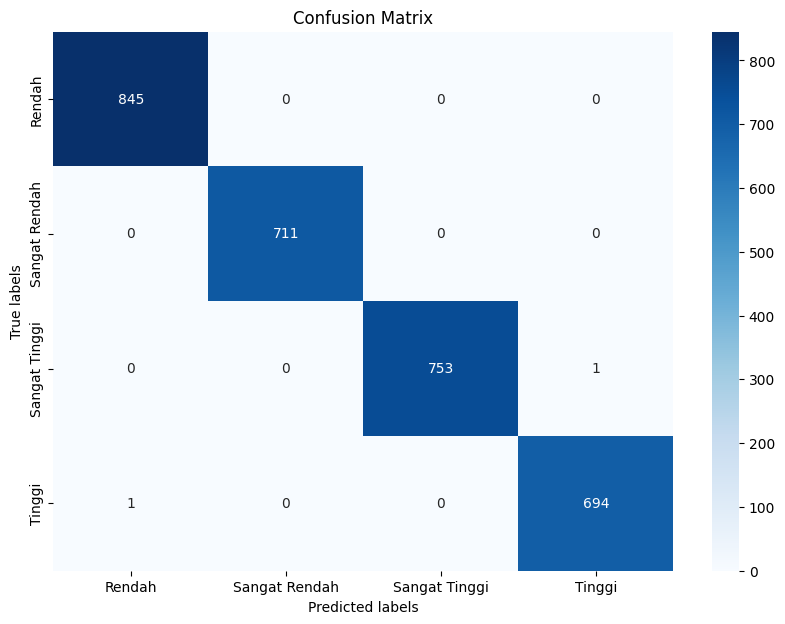

In [4]:
# Random Sampling Fitur All Component
from clasification.svm import SVMClassifier

# Load the dataset and initialize the classifier
dataset_file = 'output-baru-bimbingan-bu-ula/csv/nilai-fitur-all-component.csv'
label_column = 'Label'
except_feature_columns = ['Frame', 'Folder Path', 'Label']  # Columns to exclude

# Initialize the classifier
classifier = SVMClassifier(dataset_file, label_column, except_feature_column=except_feature_columns)

# Load, split, train, evaluate and save the model
classifier.load_data()
classifier.split_data(test_size=0.2)
classifier.train_model(autoParams=True)
classifier.evaluate_model()
classifier.save_model('svm_model_random_sampling.joblib', 'label_encoder_random_sampling.joblib')

output-baru/csv/nilai-fitur-all-component.csv
Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9933944039886737
Cross-validated Accuracy: 0.9933951479740887

Confusion Matrix:
[[2043    4   15    3]
 [   3 1511    1    2]
 [   7    5 2765    4]
 [   1    5    2 1502]]


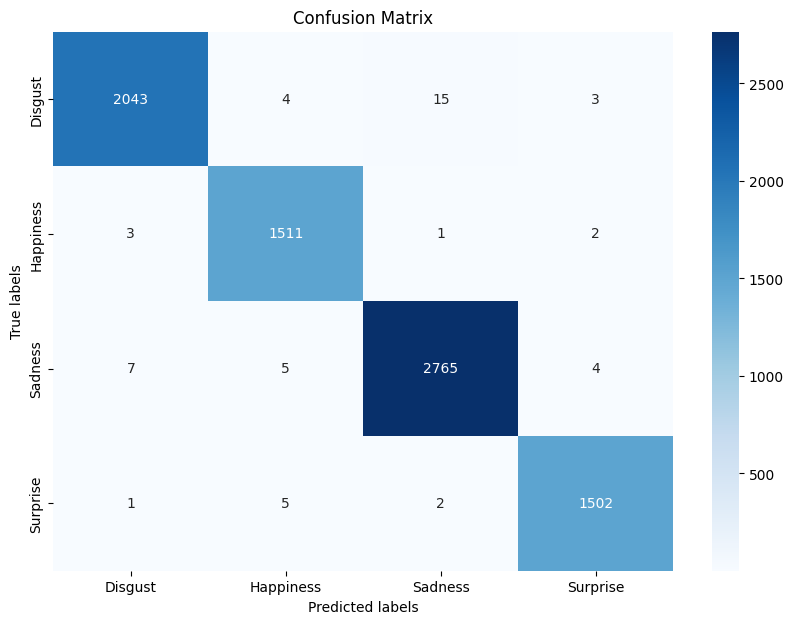

In [8]:
# KFOLD Fitur All Component
from clasification.svm import SVMClassifier

# Path dataset
dataset_file = 'output-baru/csv/nilai-fitur-all-component.csv'
label_column = 'Label'
except_feature_columns = ['Frame', 'Folder Path', 'Label']  # Kolom yang dikecualikan

# Inisialisasi classifier
classifier_kfold = SVMClassifier(dataset_file, label_column, except_feature_column=except_feature_columns)

# Load data
classifier_kfold.load_data()

# Train model menggunakan k-fold cross validation
classifier_kfold.train_model_cross_validation(cv=10)

# Evaluate model menggunakan k-fold cross validation
classifier_kfold.evaluate_model_cross_validation()

# Save model
classifier_kfold.save_model('svm_model_kfold.joblib', 'label_encoder_kfold.joblib')

output-baru/csv/4qmv-all-component.csv

Best combination found:
{'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}
Best accuracy: 0.8431746031746031
Accuracy: 0.8431746031746031

Confusion Matrix:
[[367  22  34  17]
 [ 10 248  40  13]
 [ 25  29 442  19]
 [ 12   7  19 271]]


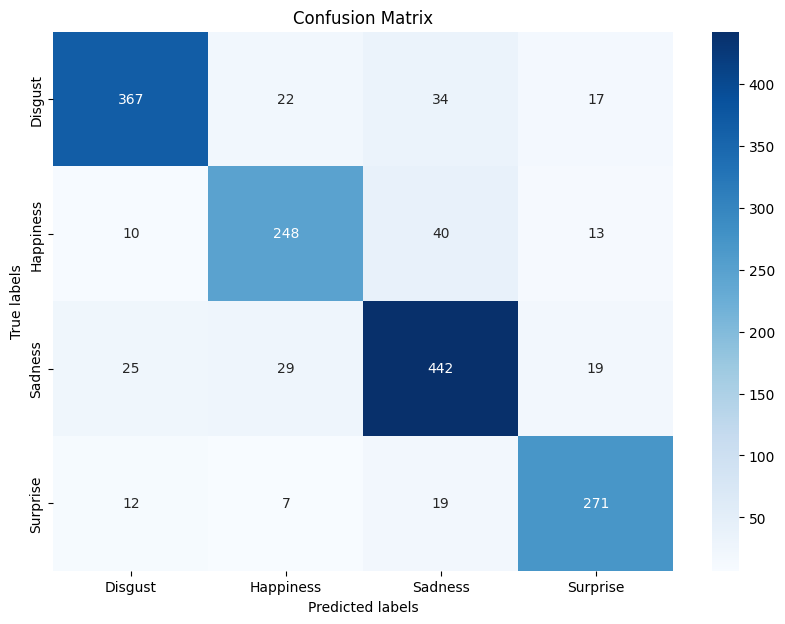

In [9]:
# Random Sampling 4QMV
from clasification.svm import SVMClassifier

# Load the dataset and initialize the classifier
# dataset_file = 'test-output/4qmv-all-component.csv'
# dataset_file = 'test-output/nilai-fitur-all-component.csv'
# dataset_file = 'output/csv/4qmv-all-component.csv'
dataset_file = 'output-baru/csv/4qmv-all-component.csv'
label_column = 'Label'
except_feature_columns = ['Frame', 'Folder Path', 'Label']  # Columns to exclude

# Initialize the classifier
classifier = SVMClassifier(dataset_file, label_column, except_feature_column=except_feature_columns)

# Load, split, train, evaluate and save the model
classifier.load_data()
classifier.split_data(test_size=0.2)
classifier.train_model(autoParams=True)
classifier.evaluate_model()
classifier.save_model('4qmv_svm_model_random_sampling.joblib', '4qmv_label_encoder_random_sampling.joblib')

output-baru/csv/4qmv-all-component.csv

Best combination found:
{'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}
Best accuracy: 0.8431746031746031
Accuracy: 0.8431746031746031

Confusion Matrix:
[[367  22  34  17]
 [ 10 248  40  13]
 [ 25  29 442  19]
 [ 12   7  19 271]]


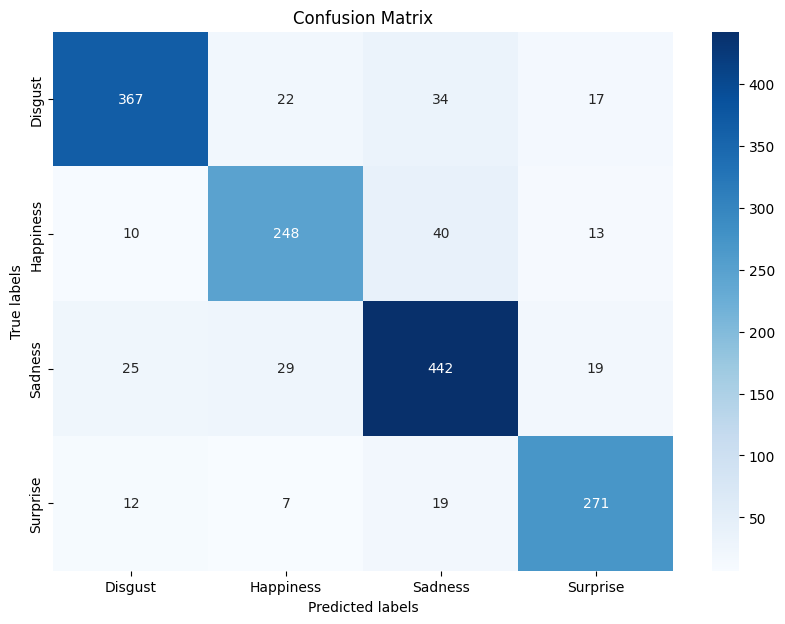

In [1]:
# Random Sampling 4QMV
from clasification.svm import SVMClassifier

# Load the dataset and initialize the classifier
# dataset_file = 'test-output/4qmv-all-component.csv'
# dataset_file = 'test-output/nilai-fitur-all-component.csv'
# dataset_file = 'output/csv/4qmv-all-component.csv'
# dataset_file = 'test-output/onsetoffset_tanpa_fear/4qmv-all-component.csv'
dataset_file = 'output-baru/csv/4qmv-all-component.csv'
label_column = 'Label'
except_feature_columns = ['Frame', 'Folder Path', 'Label']  # Columns to exclude

# Initialize the classifier
classifier = SVMClassifier(dataset_file, label_column, except_feature_column=except_feature_columns)

# Load, split, train, evaluate and save the model
classifier.load_data()
classifier.split_data(test_size=0.2)
classifier.train_model(autoParams=True)
classifier.evaluate_model()
classifier.save_model('4qmv_svm_model_kfold.joblib', '4qmv_label_encoder_kfold.joblib')

In [10]:
# KFOLD 4QMV
from clasification.svm import SVMClassifier

# Load the dataset and initialize the classifier 
# dataset_file = 'test-output/4qmv-all-component.csv'
# dataset_file = 'test-output/nilai-fitur-all-component.csv'
# dataset_file = 'test-output/onsetoffset_tanpa_fear/4qmv-all-component.csv'
dataset_file = 'output-baru/csv/4qmv-all-component.csv'
label_column = 'Label'
except_feature_columns = ['Frame', 'Folder Path', 'Label']  # Columns to exclude

# Inisialisasi classifier
classifier_kfold = SVMClassifier(dataset_file, label_column, except_feature_column=except_feature_columns)

# Load data
classifier_kfold.load_data()

# Train model menggunakan k-fold cross validation
classifier_kfold.train_model_cross_validation(cv=10)

# Evaluate model menggunakan k-fold cross validation
classifier_kfold.evaluate_model_cross_validation()

# Save model
classifier_kfold.save_model('4qmv_svm_model_kfold2.joblib', '4qmv_label_encoder_kfold2.joblib')

output-baru/csv/4qmv-all-component.csv
